### Define a Bezier Curve

In [1]:
from bezier_fit import BezierCurve

control_points=[[10, 10], [15, 20], [60, 40], [50, 50]]
degree = 3

curve = BezierCurve(degree=degree, control_points=control_points)
bezier_points = curve.get_curve(num=100) # num is the number of points to sample

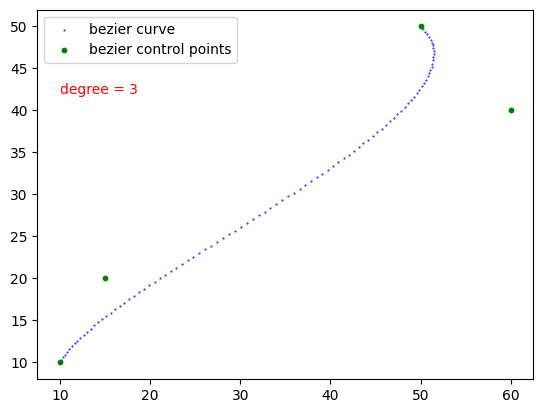

In [4]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(5, 2))
plt.scatter(x=[c[0] for c in bezier_points], y=[c[1] for c in bezier_points], c="blue", label="bezier curve", s=0.2)
plt.scatter(x=[c[0] for c in curve.control_points], y=[c[1] for c in curve.control_points], c="green", label="bezier control points", s=10)
plt.text(s=f"degree = {degree}", x=10, y=42, c="red")
plt.legend()

### Fit the spatial coordinates of a curve to get Bezier Control Points

In [11]:
from bezier_fit import BezierCurve
import numpy as np


line_points = np.array([[10, 10], [20, 50], [40, 60], [45, 50], [45, 60], [50, 40], [60, 50]])
degree = 10
curve = BezierCurve(degree=degree)
curve.fit(line_points)
bezier_points = curve.get_curve(num=100)
control_points = curve.control_points


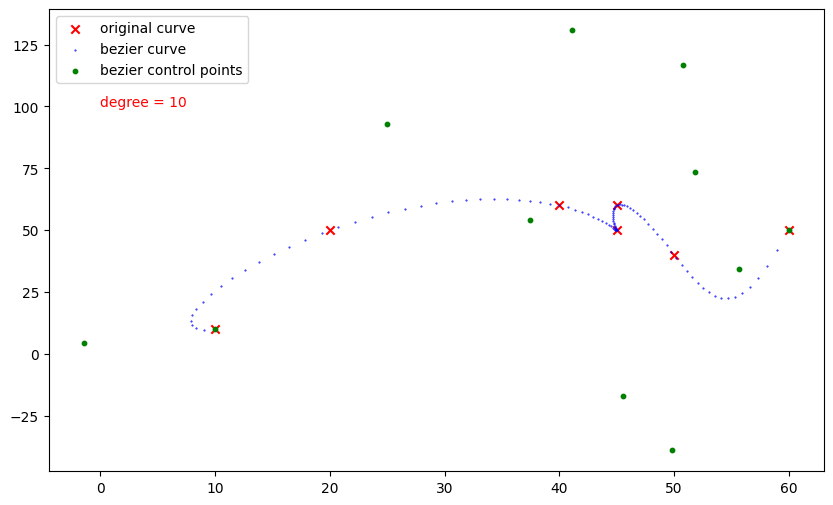

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x=[c[0] for c in line_points], y=[c[1] for c in line_points], c="red", label="original curve", marker='x')
plt.scatter(x=[c[0] for c in bezier_points], y=[c[1] for c in bezier_points], c="blue", label="bezier curve", s=0.2)
plt.scatter(x=[c[0] for c in curve.control_points], y=[c[1] for c in curve.control_points], c="green", label="bezier control points", s=10)
plt.text(s=f"degree = {degree}", x=0, y=100, c="red")
plt.legend()


### Example

Text(0.5, 1.0, 'Ground Truth Lines (Green) and Fitted Bezier Curves (Red)')

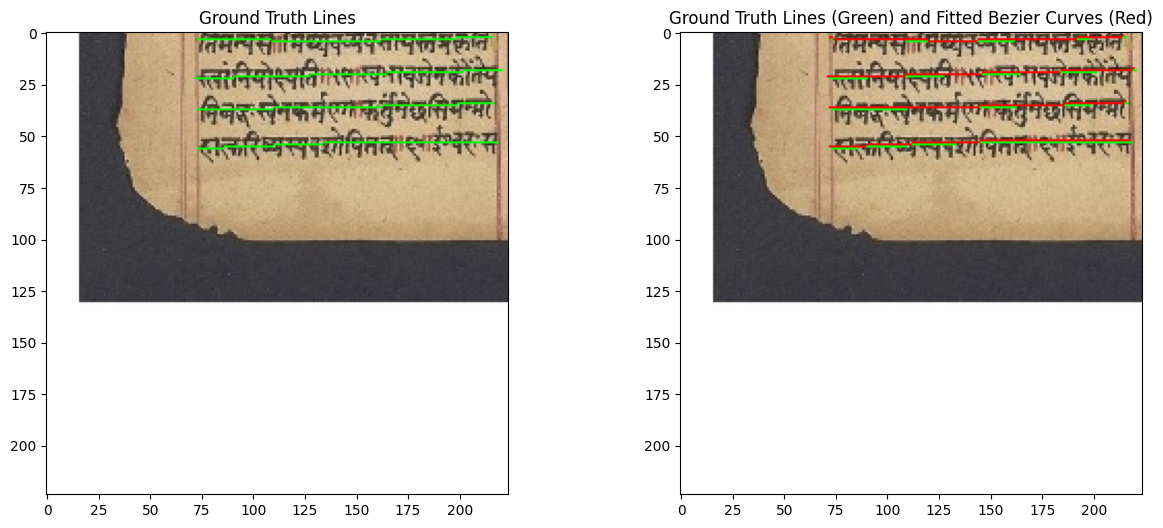

In [6]:
import cv2
import matplotlib.pyplot as plt
from bezier_fit import BezierCurve


def draw_polylines(image, lines, isClosed=False, color=(0, 255, 0), thickness=1, random_colors=True):
    import random
    import numpy as np
    for i, line in enumerate(lines):
        if random_colors:
            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        image = cv2.polylines(image, [np.array(line)], isClosed=isClosed, color=color, thickness=thickness)
    return image


# Set of Lines
lines = [
    [[73, 56], [145, 53], [218, 53]],
    [[73, 37], [145, 36], [216, 34]],
    [[72, 22], [146, 20], [220, 18]],
    [[73, 3], [144, 4], [215, 2]]
]

image_path = 'docs/demo.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = draw_polylines(image, lines, random_colors=False) # draw the lines over the image and display
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Ground Truth Lines")


# Fit a bezier curve for the lines.
bezier_lines = []
for line in lines:
    bezier_curve = BezierCurve(degree=2)
    bezier_curve.fit(line)
    bezier_points = bezier_curve.get_curve()
    bezier_points = [[int(x), int(y)] for (x, y) in bezier_points]
    bezier_lines.append(bezier_points)
image2 = draw_polylines(image, bezier_lines, color=(255, 0, 0), random_colors=False) # draw the bezier lines over the image

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title("Ground Truth Lines (Green) and Fitted Bezier Curves (Red)")